In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
os.chdir('fuel_economy_datasets')

In [3]:
df_08 = pd.read_csv('all_alpha_08.csv')
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
df_18 = pd.read_csv('all_alpha_18.csv')
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [5]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [6]:
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [7]:
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [8]:
df_08.duplicated().sum()

25

In [9]:
df_08.Fuel.value_counts()

Gasoline       2318
ethanol/gas      72
diesel           11
CNG               2
ethanol           1
Name: Fuel, dtype: int64

In [10]:
df_08.Fuel.unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [11]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

In [12]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [13]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

In [14]:
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)

In [15]:
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [16]:
(df_08.columns == df_18.columns).all()

True

In [17]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,17,22,19,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,SUV,6,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,midsize car,7,16,24,19,5,no


In [18]:
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [19]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [20]:
df_18 = df_18.query('cert_region == "CA"')
df_08 = df_18.query('cert_region == "CA"')
df_18.cert_region.unique()

array(['CA'], dtype=object)

In [21]:
# drop certification region columns form both datasets
df_08.drop('cert_region', axis=1, inplace=True)
df_18.drop('cert_region', axis=1, inplace=True)

In [22]:
df_08.columns.unique()

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [23]:
df_18.columns.unique()

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [24]:
(df_18.columns==df_08.columns).all()

True

In [25]:
# missing value count
df_08.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [26]:
# drop rows with any null values
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [27]:
df_08.isnull().sum().any()

False

In [28]:
df_18.duplicated().sum()

3

In [29]:
# drop duplicates in both datasets
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [30]:
df_08.duplicated().sum().any()

False

In [31]:
# fixing data type issue
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    int64  
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int64  
 12  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 86.8+ KB


In [32]:
(df_18.columns ==df_08.columns).all()

True

In [33]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    float64
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    int64  
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int64  
 12  smartway              794 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 86.8+ KB


In [60]:
# # convert mpg columns to float type
# mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

# for c in mpg_columns:
#     for i in c:
#         df_18[c][i] = df_18[c][i].str.astype(float)
#         df_08[c][i] = df_08[c][i].str.astype(float)

In [35]:
df_08.sample(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
949,KIA Forte5,2.0,4.0,SemiAuto-6,2WD,Gasoline,large car,3,25,34,28,6,No
1269,MINI John Cooper Works Hardtop,2.0,4.0,Man-6,2WD,Gasoline,small car,3,23,32,26,5,No
30,AUDI A4,2.0,4.0,AMS-7,4WD,Gasoline,small car,5,24,34,27,6,No
528,FERRARI 488 gtb,3.9,8.0,AutoMan-7,2WD,Gasoline,small car,3,16,22,18,3,No
468,CHRYSLER Pacifica,3.6,6.0,Auto-9,2WD,Gasoline,minivan,3,18,28,22,4,No


In [36]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

In [37]:
df_08.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [38]:
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].astype(int)

In [39]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18['cyl'].astype(int)

In [40]:
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)

In [41]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 1 to 1609
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 794 non-null    object 
 1   displ                 794 non-null    float64
 2   cyl                   794 non-null    int32  
 3   trans                 794 non-null    object 
 4   drive                 794 non-null    object 
 5   fuel                  794 non-null    object 
 6   veh_class             794 non-null    object 
 7   air_pollution_score   794 non-null    float64
 8   city_mpg              794 non-null    object 
 9   hwy_mpg               794 non-null    object 
 10  cmb_mpg               794 non-null    object 
 11  greenhouse_gas_score  794 non-null    int32  
 12  smartway              794 non-null    object 
dtypes: float64(2), int32(2), object(9)
memory usage: 80.6+ KB


In [42]:
df_08.index

Int64Index([   1,    3,    4,    6,    8,   10,   12,   14,   17,   22,
            ...
            1591, 1593, 1595, 1597, 1599, 1601, 1603, 1605, 1607, 1609],
           dtype='int64', length=794)

<AxesSubplot:>

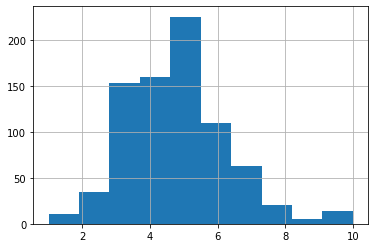

In [43]:
# explore with visuals
# distribution, skewing, correlation relationship
df_08.greenhouse_gas_score.hist()

<AxesSubplot:>

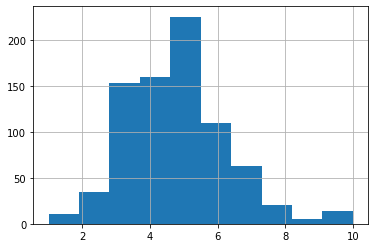

In [44]:
# explore with visuals
# distribution, skewing, correlation relationship
df_18.greenhouse_gas_score.hist()

<AxesSubplot:>

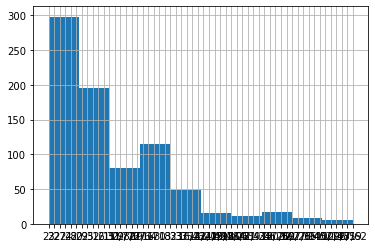

In [45]:
df_18.cmb_mpg.hist()

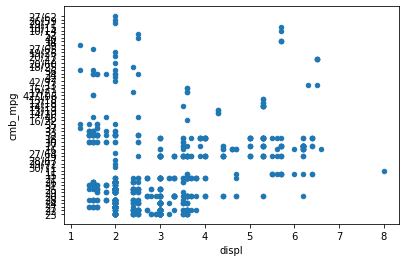

In [46]:
df_08.plot(x="displ", y="cmb_mpg", kind="scatter");

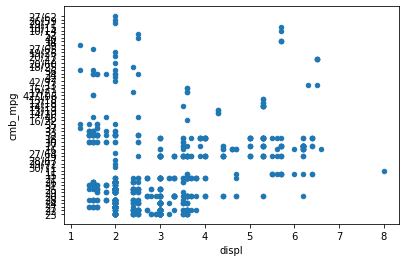

In [47]:
df_18.plot(x="displ", y="cmb_mpg", kind="scatter");

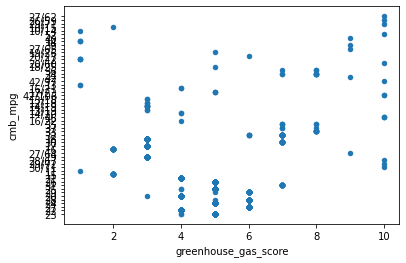

In [48]:
df_08.plot(x="greenhouse_gas_score", y="cmb_mpg", kind="scatter");

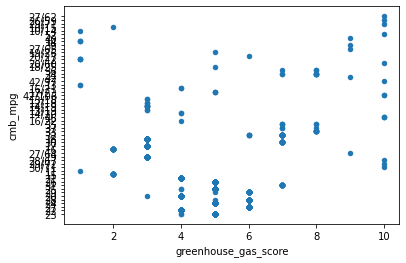

In [49]:
df_18.plot(x="greenhouse_gas_score", y="cmb_mpg", kind="scatter");

In [50]:
# load datasets
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [51]:
# draw conclusion
# Q1. more unique vehicle switching to alternative fuels i.e.ethanol,electricity,CNG
df_18.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [52]:
df_08.fuel.value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [58]:
alt_08 = df_08.query('fuel in ["ethanol","CNG"]').model.nunique()/df_08.model.nunique()
alt_08

0.005305039787798408

In [57]:
alt_18 = df_18.query('fuel in ["Ethanol","Electricity"]').model.nunique()/df_18.model.nunique()
alt_18

0.07282913165266107

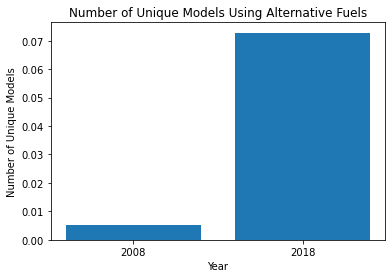

In [59]:
plt.bar(["2008", "2018"], [alt_08, alt_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

In [ ]:
#